In [1]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import sqlite3
import pandas as pd
import re
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


raw_folder = '/home/colin/Desktop/SF_Parking/data/raw/'
proc_folder = '/home/colin/Desktop/SF_Parking/data/processed/'
connwrong = sqlite3.connect(proc_folder + 'SF_Parking.db')
conn = sqlite3.connect(raw_folder+'SF_Parking.db')

In [3]:
streetvolume = gpd.read_file(proc_folder + '/final_streets/SF_Street_Data.shp')


In [4]:
streetvolume[streetvolume.lineid == 57318]

,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,bike_class,time_ea,total_am,total_pm,total_ev,total_ea,index_righ,park_suppl,ST_NAME,geometry
15449,57318,0.0,0.05226,CALIFORNIA,17.71168,0.77237,4.0,16.66667,0,30,0,0.18814,110.96679,61.03229,58.24888,22.48405,NaN,0.0,None,LINESTRING (-122.3690671988072 37.818729331209...


In [6]:
ad1 = pd.read_sql_query('Select * from address_data', conn)
ad2 = pd.read_sql_query('Select * from address_data', connwrong)

In [7]:
ad1.head()

,index,address,lat,lon,lineid,nhood,number,street,streetname
0,61,950 MCALLISTER ST,37.77961,-122.427777,44668.0,Western Addition,950,MCALLISTER ST,MCALLISTER
1,65,940 MCALLISTER ST,37.77961,-122.427777,44668.0,Western Addition,940,MCALLISTER ST,MCALLISTER
2,69,938 MCALLISTER ST,37.77961,-122.427777,44668.0,Western Addition,938,MCALLISTER ST,MCALLISTER
3,73,936 MCALLISTER ST,37.77961,-122.427777,44668.0,Western Addition,936,MCALLISTER ST,MCALLISTER
4,77,934 MCALLISTER ST,37.77961,-122.427777,44668.0,Western Addition,934,MCALLISTER ST,MCALLISTER


In [8]:
ad2.head()

,index,address,lat,lon,lineid,nhood,number,street,streetname
0,61,950 MCALLISTER ST,37.77961,-122.427777,44597.0,Western Addition,950,MCALLISTER ST,MCALLISTER
1,65,940 MCALLISTER ST,37.77961,-122.427777,44597.0,Western Addition,940,MCALLISTER ST,MCALLISTER
2,69,938 MCALLISTER ST,37.77961,-122.427777,44597.0,Western Addition,938,MCALLISTER ST,MCALLISTER
3,73,936 MCALLISTER ST,37.77961,-122.427777,44597.0,Western Addition,936,MCALLISTER ST,MCALLISTER
4,77,934 MCALLISTER ST,37.77961,-122.427777,44597.0,Western Addition,934,MCALLISTER ST,MCALLISTER


In [48]:
streets1 = pd.read_sql_query('Select * from street_volume_data', conn)
streets2 = pd.read_sql_query('Select * from street_volume_data', connwrong)

In [49]:
streets1[streets1.lineid == 49212]

,index,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,bike_class,time_ea,total_am,total_pm,total_ev,total_ea,park_supply,ST_NAME
11149,19198,49212,0.0,0.13,09TH,0.0,0.0,0.0,16.66667,0,30,0,0.468,0.17999,53.79558,43.76121,0.0,0.0,CALIFORNIA


In [50]:
streets2[streets2.lineid == 49212]

,index,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,bike_class,time_ea,total_am,total_pm,total_ev,total_ea,pdistance,park_supply,ST_NAME
22663,19198,49212,0.0,2.002132e-09,9TH,0.0,0.0,0.0,16.66667,0,30,0,0.468,0.17999,53.79558,43.76121,0.0,0.059679,0.0,CALIFORNIA


In [15]:
streets2[streets2.lineid == 44597]

,index,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,bike_class,time_ea,total_am,total_pm,total_ev,total_ea,pdistance,park_supply,ST_NAME
18654,15174,44597,0.0,0.038163,MC ALLISTER,0.89286,0.11223,18.0,13.88889,0,25,3,0.7776,76.63163,315.08738,102.0791,19.00509,0.023345,0.0,BUCHANAN


/home/colin/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


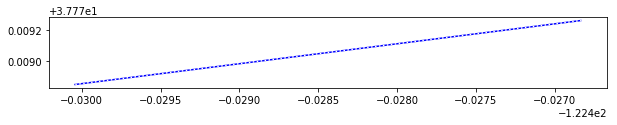

In [35]:
check = ad1[ad1.lineid == 44698]
geometry = [Point(xy) for xy in zip(check.lon, check.lat)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(check, crs=crs, geometry=geometry)   
streetvolume = gpd.read_file(proc_folder + 'final_streets/SF_Street_Data.shp')
streetvolume = streetvolume.to_crs(epsg = 4326)

streets1 = streetvolume[streetvolume.lineid == 44668]
streets2 = streetvolume[streetvolume.lineid == 44597]

ax = streets1['geometry'].plot( color = 'blue', figsize = (10,10))
streets2['geometry'].plot(ax = ax, color = 'white', linestyle = ':')
gdf.plot( ax = ax, marker = "*", markersize = 8)

In [31]:
streets = streetvolume 
streets[streets.lineid.isin([44668, 44597])]['geometry']

18625    LINESTRING (-122.4300472810583 37.778850934235...
18654    LINESTRING (-122.4268285422694 37.779257965254...
Name: geometry, dtype: object

In [32]:
streets1

,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,...,time_ea,total_am,total_pm,total_ev,total_ea,pdistance,index_righ,park_suppl,ST_NAME,geometry
18625,44668,0.0,0.038163,MC ALLISTER,7.49702,0.20561,18.0,13.88889,0,25,...,0.7776,102.37235,64.01482,59.19957,25.70263,0.023345,5396.0,0.0,BUCHANAN,LINESTRING (-122.4300472810583 37.778850934235...


In [33]:
streets2

,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,...,time_ea,total_am,total_pm,total_ev,total_ea,pdistance,index_righ,park_suppl,ST_NAME,geometry
18654,44597,0.0,0.038163,MC ALLISTER,0.89286,0.11223,18.0,13.88889,0,25,...,0.7776,76.63163,315.08738,102.0791,19.00509,0.023345,5396.0,0.0,BUCHANAN,LINESTRING (-122.4268285422694 37.779257965254...


In [37]:
streetsweeping = gpd.read_file(proc_folder + '/final_sweeping/final_sweeping.shp')

In [74]:
streetsweeping.columns

Index(['blockside', 'blocksweep', 'cnn', 'cnnrightle', 'corridor', 'district',
       'fromhour', 'holidays', 'lf_fadd', 'lf_toadd', 'lineid', 'multigeom',
       'nhood', 'rt_fadd', 'rt_toadd', 'streetname', 'tohour', 'total_ea',
       'totalpermo', 'week1ofmon', 'week2ofmon', 'week3ofmon', 'week4ofmon',
       'week5ofmon', 'weekday', 'zip_code', 'geometry'],
      dtype='object')

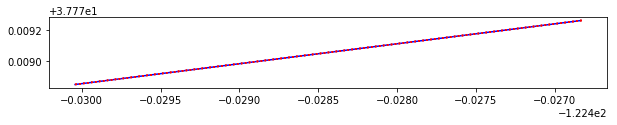

In [41]:

geometry = [Point(xy) for xy in zip(check.lon, check.lat)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(check, crs=crs, geometry=geometry)   
streetvolume = gpd.read_file(proc_folder + 'final_streets/SF_Street_Data.shp')
streetvolume = streetvolume.to_crs(epsg = 4326)

streets1 = streetvolume[streetvolume.lineid == 44668]
streets2 = streetvolume[streetvolume.lineid == 44597]

ax = streets1['geometry'].plot( color = 'blue', figsize = (10,10))
streets2['geometry'].plot(ax = ax, color = 'white', linestyle = ':')
streetsweeping[streetsweeping.lineid.isin([44597])].plot(ax = ax, color = 'red', linestyle = ':')

In [54]:
streetsweeping[streetsweeping.lineid == 49212]

,blockside,blocksweep,cnn,cnnrightle,corridor,district,fromhour,holidays,lf_fadd,lf_toadd,...,total_ea,totalpermo,week1ofmon,week2ofmon,week3ofmon,week4ofmon,week5ofmon,weekday,zip_code,geometry
101053,East,1606970,424000,L,09th Ave,None,07:00,N,200,298,...,NaN,2,1,0,1,0,0,Thu,94118,LINESTRING (-122.4677642646017 37.784668628495...
101054,West,1622659,424000,R,09th Ave,None,07:00,N,200,298,...,NaN,2,1,0,1,0,0,Tues,94118,LINESTRING (-122.4677642646017 37.784668628495...


In [45]:
ad2[ad2.lineid == 49212.0]

,index,address,lat,lon,lineid,nhood,number,street,streetname
135003,1770516,290 09TH AVE,37.783066,-122.467473,49212.0,Inner Richmond,290,09TH AVE,09TH
135004,1770518,294 09TH AVE,37.783066,-122.467473,49212.0,Inner Richmond,294,09TH AVE,09TH
135005,1770520,293 09TH AVE,37.783066,-122.467473,49212.0,Inner Richmond,293,09TH AVE,09TH
135006,1770522,295 09TH AVE,37.783066,-122.467473,49212.0,Inner Richmond,295,09TH AVE,09TH
135007,1770524,291 09TH AVE,37.783066,-122.467473,49212.0,Inner Richmond,291,09TH AVE,09TH
135045,1771488,289 09TH AVE,37.783037,-122.467870,49212.0,Inner Richmond,289,09TH AVE,09TH
142252,1971480,253 09TH AVE,37.783648,-122.468020,49212.0,Inner Richmond,253,09TH AVE,09TH
142253,1971482,256 09TH AVE,37.783639,-122.467545,49212.0,Inner Richmond,256,09TH AVE,09TH
142254,1971484,257 09TH AVE,37.783639,-122.467545,49212.0,Inner Richmond,257,09TH AVE,09TH
142255,1971486,254 09TH AVE,37.783635,-122.467542,49212.0,Inner Richmond,254,09TH AVE,09TH


In [55]:
spaces = gpd.read_file(raw_folder + '/onstreet_parking/Sfpark_OnStreetParkingCensus_201404.shp')

In [57]:
streets1 = pd.read_sql_query("Select distinct t2.lineid, nhood, distance, total_ea, vvol_busea, speed_ea, count(*) total_tickets "
                       'from ticket_data t1 join address_data t2 on t1.address = t2.address ' 
                       ' join street_volume_data t3 on t2.lineid = t3.lineid '
                       " Where ViolationDesc = 'RES/OT' group by t2.lineid", conn)

streets2 = pd.read_sql_query("Select distinct t2.lineid, nhood, distance, total_ea, vvol_busea, speed_ea, count(*) total_tickets "
                       'from ticket_data t1 join address_data t2 on t1.address = t2.address ' 
                       ' join street_volume_data t3 on t2.lineid = t3.lineid '
                       " Where ViolationDesc = 'RES/OT' group by t2.lineid", connwrong)

In [60]:
streets1.merge(streets2, left_on = 'lineid', right_on = 'lineid')

,lineid,nhood_x,distance_x,total_ea_x,vvol_busea_x,speed_ea_x,total_tickets_x,nhood_y,distance_y,total_ea_y,vvol_busea_y,speed_ea_y,total_tickets_y
0,28122.0,Visitacion Valley,0.07000,42.69778,0.00,16.66667,1,Visitacion Valley,0.096445,42.69778,0.00,16.66667,1
1,28409.0,Oceanview/Merced/Ingleside,0.04980,72.56350,12.00,19.44440,125,Oceanview/Merced/Ingleside,0.090022,72.56350,12.00,19.44440,125
2,29028.0,Bayview Hunters Point,0.05000,4.10316,0.00,16.66667,3,Bayview Hunters Point,0.085618,4.10316,0.00,16.66667,3
3,29078.0,Portola,0.06000,0.00000,0.00,16.66667,4,Portola,0.086457,0.00000,0.00,16.66667,4
4,29152.0,Financial District/South Beach,0.04000,1033.20675,45.18,16.23133,52,Financial District/South Beach,0.070410,1033.20675,45.18,16.23133,52
5,29231.0,Bayview Hunters Point,0.13000,35.54781,0.00,19.44443,1,Bayview Hunters Point,0.087896,35.54781,0.00,19.44443,1
6,29575.0,Bernal Heights,0.04000,8.00086,0.00,16.66667,3,Bernal Heights,0.073749,8.00086,0.00,16.66667,3
7,29593.0,Bernal Heights,0.10000,15.48806,0.00,16.66667,2,Bernal Heights,0.073290,15.48806,0.00,16.66667,2
8,29599.0,Bernal Heights,0.06000,0.00000,0.00,16.66667,2,Bernal Heights,0.072633,0.00000,0.00,16.66667,2
9,29769.0,Portola,0.06000,4.24235,0.00,16.66667,1,Portola,0.081820,4.24235,0.00,16.66667,1


In [61]:
streets1.head()

,lineid,nhood,distance,total_ea,vvol_busea,speed_ea,total_tickets
0,28122.0,Visitacion Valley,0.0700,42.69778,0.00,16.66667,1
1,28409.0,Oceanview/Merced/Ingleside,0.0498,72.56350,12.00,19.44440,125
2,29028.0,Bayview Hunters Point,0.0500,4.10316,0.00,16.66667,3
3,29078.0,Portola,0.0600,0.00000,0.00,16.66667,4
4,29152.0,Financial District/South Beach,0.0400,1033.20675,45.18,16.23133,52


In [62]:
streets2.head()

,lineid,nhood,distance,total_ea,vvol_busea,speed_ea,total_tickets
0,28122.0,Visitacion Valley,0.096445,42.69778,0.00,16.66667,1
1,28409.0,Oceanview/Merced/Ingleside,0.090022,72.56350,12.00,19.44440,125
2,29028.0,Bayview Hunters Point,0.085618,4.10316,0.00,16.66667,3
3,29078.0,Portola,0.086457,0.00000,0.00,16.66667,4
4,29152.0,Financial District/South Beach,0.070410,1033.20675,45.18,16.23133,52


In [63]:
#Original
streetvolume[streetvolume.lineid == 28122]

,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,...,time_ea,total_am,total_pm,total_ev,total_ea,pdistance,index_righ,park_suppl,ST_NAME,geometry
7145,28122,0.0,0.096445,LELAND,41.27266,1.42512,0.0,16.66667,0,30,...,0.252,312.49645,167.95977,175.25074,42.69778,0.082626,14783.0,17.0,LELAND,LINESTRING (-122.4048034238932 37.711610583606...


In [75]:
streetvolume = gpd.read_file(proc_folder + 'final_streets/SF_Street_Data.shp')
streetvolume[streetvolume.lineid == 28122]

,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,bike_class,time_ea,total_am,total_pm,total_ev,total_ea,geometry
652,28122,0.0,0.07,LELAND,41.27266,1.42512,0.0,16.66667,0,30,0,0.252,312.49645,167.95977,175.25074,42.69778,LINESTRING (-122.4048034238932 37.711610583606...


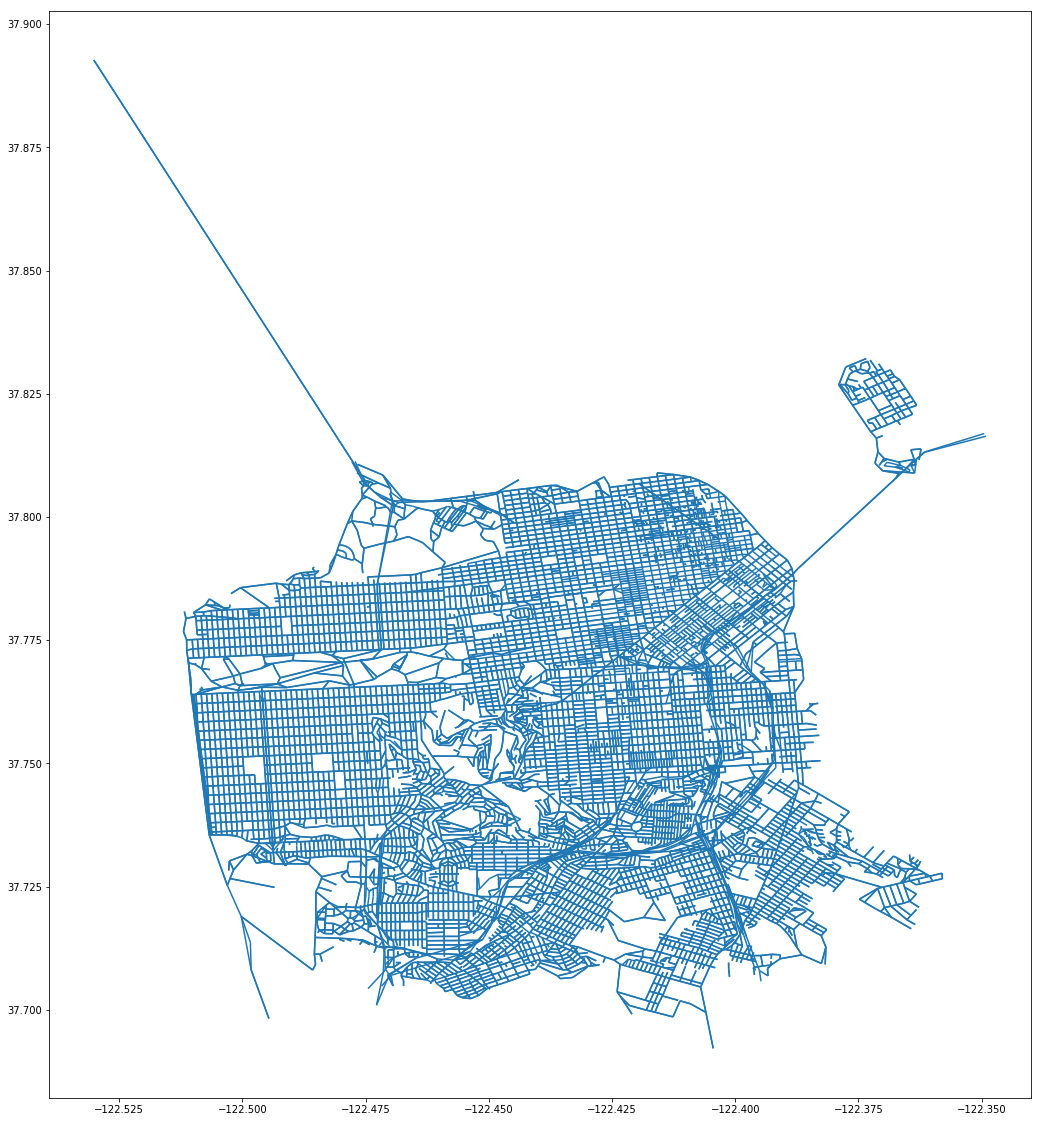

In [64]:
streetvolume = gpd.read_file(raw_folder + '/street_volume/LOADALL_FINAL.shp')
streetvolume.crs = {'init' : 'epsg:2227'}
streetvolume = streetvolume.to_crs(epsg = 4326)
streetvolume = streetvolume[streetvolume['MTYPE'] == 'SF']
streetvolume.columns = streetvolume.columns.str.lower()
streetvolume[pd.isnull(streetvolume.streetname) == False].plot(figsize = (20,20))
streetvolume = streetvolume[(streetvolume['distance'] <= 7) & (pd.isnull(streetvolume.streetname) == False)]

In [71]:
streetvolume['distance'].describe()

count    26797.000000
mean         0.076750
std          0.061292
min          0.004010
25%          0.050000
50%          0.060000
75%          0.090000
max          1.980000
Name: distance, dtype: float64

In [73]:
streetvolume = gpd.read_file(proc_folder + 'final_streets/SF_Street_Data.shp')
streetvolume = streetvolume.to_crs(epsg = 4326)
streetvolume['distance'].describe()

count    26797.000000
mean         0.055385
std          0.023869
min          0.000000
25%          0.038014
50%          0.055903
75%          0.071478
max          0.123646
Name: distance, dtype: float64